In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
TICKER = "GOOG"
PERIOD = "5y"
INTERVAL = "1d"
GOOG = yf.Ticker(TICKER)
GOOG_PRICES = GOOG.history(period="5y", interval="1d")
GOOG_PRICES["3ma"] = GOOG_PRICES["Close"].rolling(5).mean()
GOOG_PRICES["20ma"] = GOOG_PRICES["Close"].rolling(20).mean()
GOOG_PRICES = GOOG_PRICES.dropna(subset=["3ma"]).copy()
signal_today = (GOOG_PRICES["Close"] < GOOG_PRICES["3ma"]).astype(int)
GOOG_PRICES["Position"] = signal_today.shift(1).fillna(0)
GOOG_PRICES["Return"] = GOOG_PRICES["Close"].pct_change().fillna(0)
GOOG_PRICES["Strat_Ret"] = GOOG_PRICES["Return"] * GOOG_PRICES["Position"]
GOOG_PRICES["Market_Cum"] = (1 + GOOG_PRICES["Return"]).cumprod()
GOOG_PRICES["Strat_Cum"] = (1 + GOOG_PRICES["Strat_Ret"]).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(GOOG_PRICES.index, GOOG_PRICES["Market_Cum"], label="Buy and Hold")
plt.plot(GOOG_PRICES.index, GOOG_PRICES["Strat_Cum"], label="Swing Trade")
plt.title("GOOG Growth of $1")
plt.xlabel("Date"), plt.ylabel("Value")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(GOOG_PRICES.index, GOOG_PRICES["Close"], label="Close Price")
plt.plot(GOOG_PRICES.index, GOOG_PRICES["3ma"], label="3 Day SMA")
plt.plot(GOOG_PRICES.index, GOOG_PRICES["20ma"], label="20 Day SMA")
plt.legend()
plt.show()
GOOG_PRICES["Strat_Cum"].tail(10)

In [ ]:
SP500 = yf.Ticker("^GSPC")
sp_prices = pd.DataFrame(SP500.history(period="10y", interval="1d"))
plt.figure(figsize=(12, 6))
sp_prices["5ma"] = sp_prices["Close"].ewm(span=5, adjust=False).mean()

for i in (10, 15, 30, 60, 90):
    sp_prices_iteration = sp_prices.copy()
    sp_prices_iteration["long_ma"] = sp_prices_iteration["Close"].ewm(
        span=i, adjust=False).mean()
    sp_prices_iteration = sp_prices_iteration.dropna(subset=["5ma", "long_ma"])
    signal_buy = (sp_prices_iteration["Close"] <
                  sp_prices_iteration["long_ma"]).astype(int)
    sp_prices_iteration["strat_ret"] = (
        1 + sp_prices_iteration["Close"].pct_change().fillna(0) * signal_buy.shift(1).fillna(0)).cumprod()
    plt.plot(sp_prices_iteration.index,
             sp_prices_iteration["strat_ret"], label=f"{i} MA Swing Trading")
sp_prices["mkt_ret"] = (1+sp_prices["Close"].pct_change().fillna(0)).cumprod()

plt.title("S&P 500 Growth of $1")
plt.xlabel("Date"), plt.ylabel("Value")
plt.plot(sp_prices.index, sp_prices["mkt_ret"], label="Buy and Hold")
plt.legend()
plt.show()

In [188]:
df = yf.download(tickers="TSLA, AAPL", period="5y", interval="1d")
df["7ema", "TSLA"], df["7ema", "AAPL"] = df["Close", "TSLA"].ewm(
    span=7, adjust=False).mean(), df["Close", "AAPL"].ewm(span=7, adjust=False).mean()
df["21ema", "TSLA"], df["21ema", "AAPL"] = df["Close", "TSLA"].ewm(
    span=21, adjust=False).mean(), df["Close", "AAPL"].ewm(span=21, adjust=False).mean()
df = df.dropna(subset=[("7ema", "TSLA"), ("21ema", "TSLA")])
signal_buy_tsla = ((df["7ema", "TSLA"] > df["21ema", "TSLA"]) & (
    df["Close", "TSLA"] > df["7ema", "TSLA"])).astype(int)
df["eq_value", "TSLA"] = (
    1+df["Close", "TSLA"].pct_change() * signal_buy_tsla.shift(1)).cumprod()
df["mkt_value", "TSLA"] = (1+df["Close", "TSLA"].pct_change()).cumprod()

/var/folders/qy/v8xq2pb11n5c02fypwnbyv_80000gn/T/ipykernel_27791/1017808607.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers="TSLA, AAPL", period="5y", interval="1d")
[*********************100%***********************]  2 of 2 completed


In [189]:
signal_buy_aapl = ((df["7ema", "AAPL"] > df["21ema", "AAPL"]) & (
    df["Close", "AAPL"] > df["7ema", "AAPL"])).astype(int)
df["eq_value", "AAPL"] = (
    1+df["Close", "AAPL"].pct_change() * signal_buy_aapl.shift(1)).cumprod()
df["mkt_value", "AAPL"] = (1+df["Close", "AAPL"].pct_change()).cumprod()
df

Price            Close                    High                     Low  \
Ticker            AAPL        TSLA        AAPL        TSLA        AAPL   
Date                                                                     
2020-09-08  109.742027  110.070000  115.743695  122.913330  109.605847   
2020-09-09  114.119247  122.093330  115.889593  123.000000  112.115451   
2020-09-10  110.393723  123.779999  117.212475  132.996674  109.430734   
2020-09-11  108.944389  124.239998  112.086271  127.500000  106.998954   
2020-09-14  112.212715  139.873337  112.767164  140.000000  109.722560   
...                ...         ...         ...         ...         ...   
2025-08-29  232.139999  333.869995  233.380005  348.750000  231.369995   
2025-09-02  229.720001  329.359985  230.850006  333.329987  226.970001   
2025-09-03  238.470001  334.089996  238.850006  343.329987  234.360001   
2025-09-04  239.779999  338.529999  239.899994  338.890015  236.740005   
2025-09-05  239.690002  350.839996  241.320007  355.869995  238.490005   

Price                         Open                 Volume             \
Ticker            TSLA        AAPL        TSLA       AAPL       TSLA   
Date                                                                   
2020-09-08  109.959999  110.841196  118.666664  231366600  346397100   
2020-09-09  113.836670  114.060887  118.866669  176940500  238397400   
2020-09-10  120.186668  117.076295  128.736664  182274400  254791800   
2020-09-11  120.166664  111.444274  127.313332  180860300  182152500   
2020-09-14  124.433334  111.590176  126.983330  140150100  249061800   
...                ...         ...         ...        ...        ...   
2025-08-29  331.700012  232.509995  347.230011   39418400   81145700   
2025-09-02  325.600006  229.250000  328.230011   44075600   58392000   
2025-09-03  328.510010  237.210007  335.200012   66427800   88733300   
2025-09-04  331.480011  238.449997  336.149994   47549400   60711000   
2025-09-05  344.679993  240.000000  348.000000   54837300  108771700   

Price             7ema                   21ema              eq_value  \
Ticker            TSLA        AAPL        TSLA        AAPL      TSLA   
Date                                                                   
2020-09-08  110.070000  109.742027  110.070000  109.742027       NaN   
2020-09-09  113.075832  110.836332  111.163030  110.139956  1.000000   
2020-09-10  115.751874  110.725680  112.310027  110.163026  1.013815   
2020-09-11  117.873905  110.280357  113.394570  110.052241  1.017582   
2020-09-14  123.373763  110.763447  115.801730  110.248648  1.145626   
...                ...         ...         ...         ...       ...   
2025-08-29  340.451330  230.191814  333.646268  225.397462  5.101654   
2025-09-02  337.678494  230.073861  333.256606  225.790420  5.101654   
2025-09-03  336.781369  232.172896  333.332369  226.943109  5.101654   
2025-09-04  337.218527  234.074672  333.804881  228.110099  5.101654   
2025-09-05  340.623894  235.478504  335.353527  229.162817  5.287166   

Price      mkt_value  eq_value mkt_value  
Ticker          TSLA      AAPL      AAPL  
Date                                      
2020-09-08       NaN       NaN       NaN  
2020-09-09  1.109233  1.000000  1.039886  
2020-09-10  1.124557  0.967354  1.005938  
2020-09-11  1.128736  0.967354  0.992732  
2020-09-14  1.270767  0.967354  1.022514  
...              ...       ...       ...  
2025-08-29  3.033252  1.589960  2.115325  
2025-09-02  2.992278  1.573385  2.093273  
2025-09-03  3.035250  1.573385  2.173005  
2025-09-04  3.075588  1.582028  2.184942  
2025-09-05  3.187426  1.581434  2.184122  

[1255 rows x 18 columns]

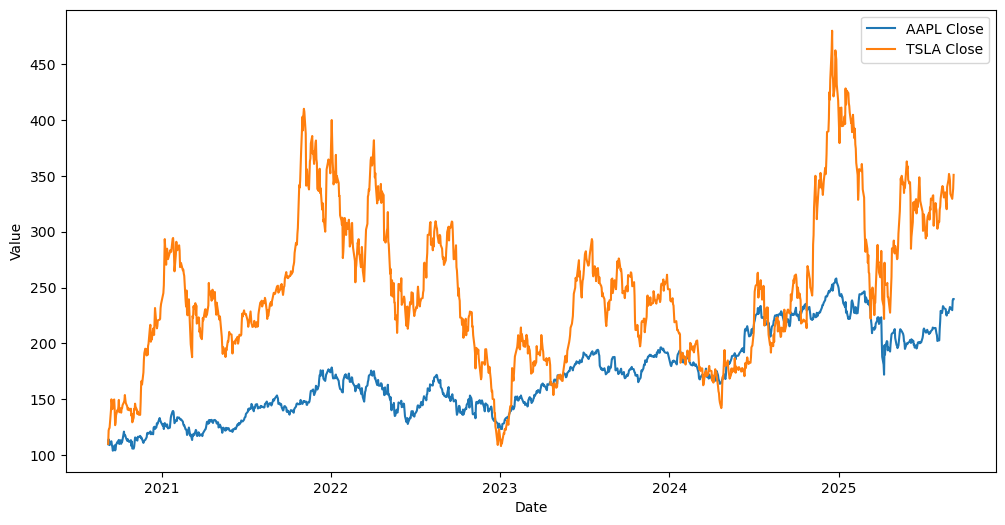

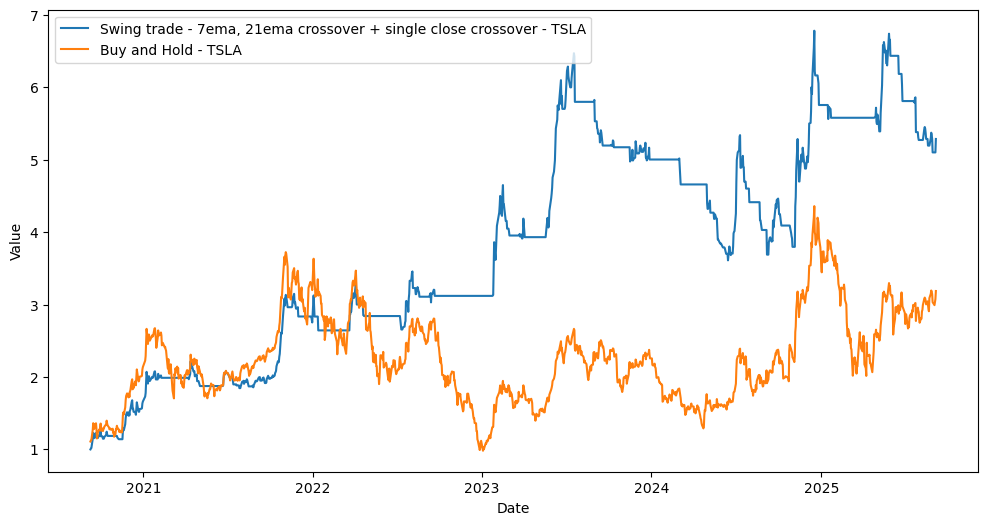

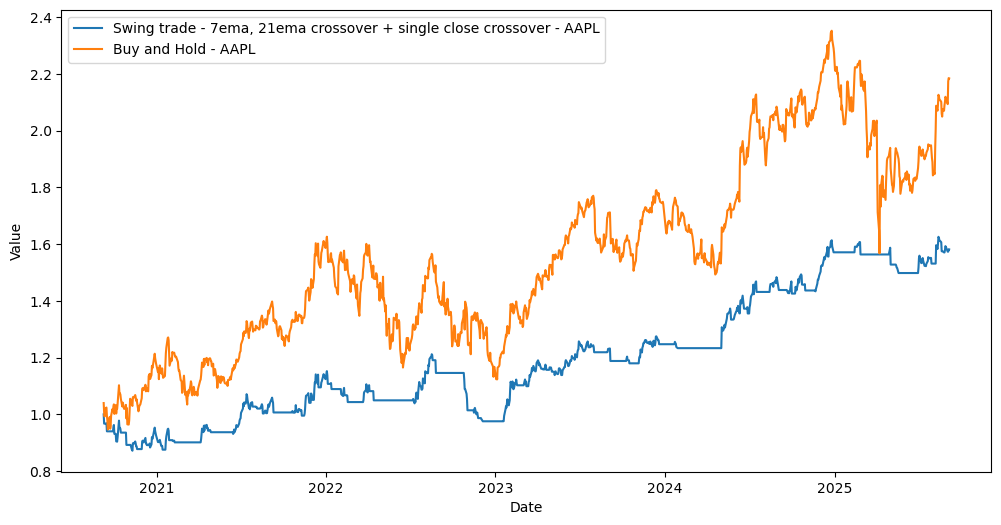

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close", "AAPL"], label="AAPL Close")
plt.plot(df.index, df["Close", "TSLA"], label="TSLA Close")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["eq_value", "TSLA"],
         label="Swing trade - 7ema, 21ema crossover + single close crossover - TSLA")
plt.plot(df.index, df["mkt_value", "TSLA"], label="Buy and Hold - TSLA")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(df.index, df["eq_value", "AAPL"],
         label="Swing trade - 7ema, 21ema crossover + single close crossover - AAPL")
plt.plot(df.index, df["mkt_value", "AAPL"], label="Buy and Hold - AAPL")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()